### Thermal Stimulator Temperature[Hot/Cold]
#### Objective: Our thermal stimulator device does not provide information on how increasing or decreasing the voltage from the amplifier affects the current temperature it applies. Since we are working with human skin and the thermal stimulator is a heat-conductive device, we aimed to explore how the surface temperature of the stimulator changes when the voltage is adjusted by 1 unit.


#### Solution: The thermal stimulator was placed on a table in a well-controlled environment. The voltage was increased or decreased by 1 unit every 30 seconds. A thermal camera, mounted on a tripod, recorded a thermal video of the stimulator during the experiment.

#### Sidenote
* Thermal Stimulator:  The STMTHERM from BIOPACK
* Amplifier: BioPack Amplifier | Modules
* Camera: FLIR E96
* Software: Reseach IR

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import operator

In [18]:
# Key: Voltage Value 
# Value: Mean Temperature of the Thermal stimulator Surface
voltageDictionary = {}

csv_loc = "CameraCalibrationMetadata/Thermal30IntervalHot"

for f in sorted(os.listdir(csv_loc)):
    
    voltage = f.split(".")[0]
    
        
    df  = pd.read_csv(os.path.join(csv_loc,f))
    mean_temperature_value = df.stack().mean()

    voltageDictionary[int(voltage)] = mean_temperature_value


In [19]:
sorted_val = sorted(voltageDictionary.items(), key=operator.itemgetter(0))

In [20]:
X = [x[0] for x in sorted_val]

Y = [x[1] for x in sorted_val]



In [21]:
line_x = [X[0],X[-1]]
line_y = [Y[0],Y[-1]]

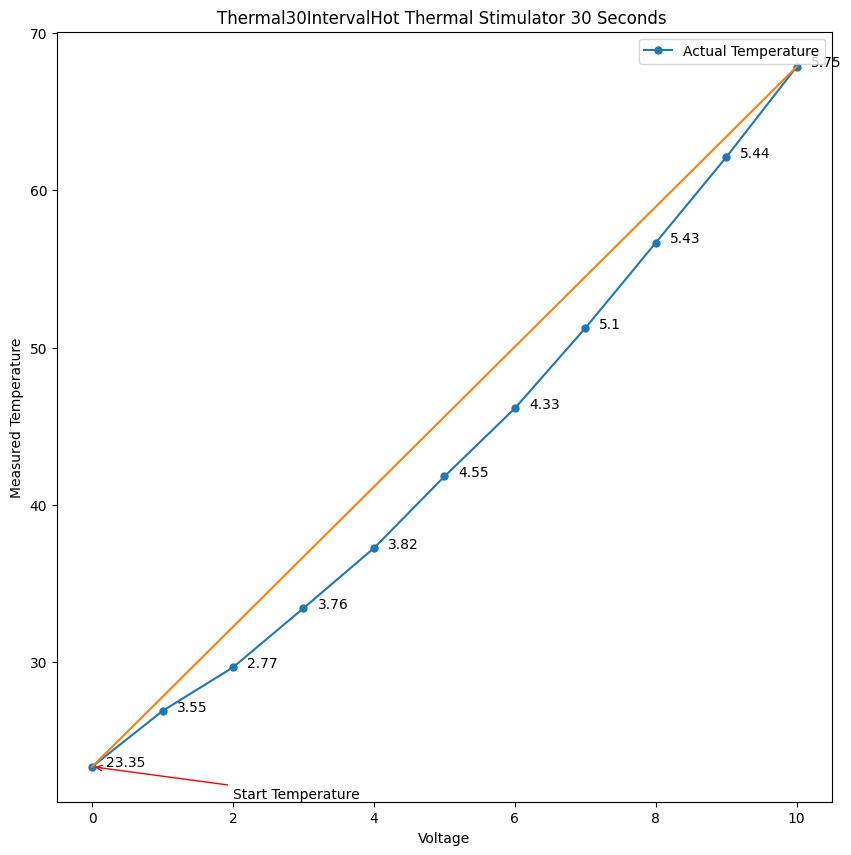

In [43]:
plt.figure(figsize=(10,10))
plt.plot(X,Y,marker='.',markersize=10)
plt.plot(line_x,line_y)


prev = 0
for i,(x,y)  in enumerate(zip(X,Y)):
    

    if i==0:
        plt.annotate(str(round(y,2)),(x+0.2,y))
        
        plt.annotate(
        'Start Temperature',
        xy=(x, y),          
        xytext=(x+2, y-2),      
        arrowprops=dict(arrowstyle='->', color='red', lw=1)  
    )

        prev=y
    else:
        difference = y-prev
        prev =y
        plt.annotate(str(round(difference,2)),(x+0.2,y))


plt.xlabel("Voltage")
plt.ylabel("Measured Temperature")

title = csv_loc.split("/")[-1]

plt.title(f"{title} Thermal Stimulator 30 Seconds ")

plt.legend(["Actual Temperature"])
plt.show()



#### Conclusion
* The starting temperature of the thermal stimulator is 23.35°C. When the voltage is increased by 1 unit, the temperature rises by 3.55°C from the current temperature. However, as the voltage increases, the temperature rise is not consistent, though there are no significant fluctuations.

* In conclusion, the thermal stimulator does not increase or decrease temperature in fixed increments. However, since our goal is to adjust the temperature by only 1 or 2 degrees, this inconsistency does not significantly affect our application.